# Newton法

/Users/ryotaroshima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


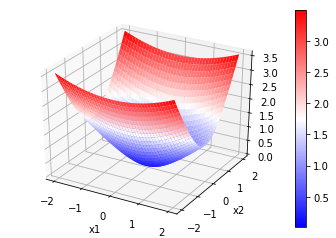

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

N = 41
x1 = np.linspace(-2, 2, N)
x2 = np.linspace(-2, 2, N)

X1, X2 = np.meshgrid(x1, x2)
Y = np.sqrt(X1**2 + 4*X2**2 + 1) - 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Y, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
fig.show()

In [2]:
def f(x):
    y = np.sqrt(x[0]**2 + 4*x[1]**2 + 1) - 1
    dydx = np.array([x[0], 4*x[1]]) / np.sqrt(x[0]**2 + 4*x[1]**2 + 1)
    H = np.array([[ 4*x[1]**2+1, -4*x[0]*x[1]],
                  [-4*x[0]*x[1],  4*x[0]**2+4]]) / (x[0]**2 + 4*x[1]**2 + 1) / np.sqrt(x[0]**2 + 4*x[1]**2 + 1)
    return y, dydx, H

In [3]:
# initial value near minima
x = [0.3, 0.3]

# newton's method
print("i    x1          x2           f(x)")
for i in range(10):    
    y, dydx, H = f(x)
    print(f"{i:3d} [{x[0]:10.3e}, {x[1]:10.3e}], {y:10.3e}")
    d = - np.dot(np.linalg.inv(H), dydx)
    x[0] += d[0]
    x[1] += d[1]

i    x1          x2           f(x)
  0 [ 3.000e-01,  3.000e-01],  2.042e-01
  1 [-1.350e-01, -1.350e-01],  4.457e-02
  2 [ 1.230e-02,  1.230e-02],  3.783e-04
  3 [-9.309e-06, -9.309e-06],  2.166e-10
  4 [ 4.033e-15,  4.033e-15],  0.000e+00
  5 [ 0.000e+00,  0.000e+00],  0.000e+00
  6 [ 0.000e+00,  0.000e+00],  0.000e+00
  7 [ 0.000e+00,  0.000e+00],  0.000e+00
  8 [ 0.000e+00,  0.000e+00],  0.000e+00
  9 [ 0.000e+00,  0.000e+00],  0.000e+00


In [4]:
# initial value
x = [1, 2]

# newton's method -> ill conditioned
print("i    x1          x2           f(x)")
for i in range(10):    
    y, dydx, H = f(x)
    print(f"{i:3d} [{x[0]:10.3e}, {x[1]:10.3e}], {y:10.3e}")
    d = - np.dot(np.linalg.inv(H), dydx)
    x[0] += d[0]
    x[1] += d[1]

i    x1          x2           f(x)
  0 [ 1.000e+00,  2.000e+00],  3.243e+00
  1 [-1.700e+01, -3.400e+01],  6.910e+01
  2 [ 8.352e+04,  1.670e+05],  3.444e+05
  3 [-9.905e+15, -1.981e+16],  4.084e+16
  4 [ 2.025e+33,  4.050e+33],  8.350e+33
  5 [-1.098e+50, -2.197e+50],  4.528e+50
  6 [ 1.257e+68,  2.514e+68],  5.182e+68
  7 [-1.413e+85, -2.826e+85],  5.825e+85
  8 [-1.165e+102, -2.329e+102], 4.801e+102
  9 [-2.274e+119, -4.548e+119], 9.375e+119
